<a href="https://colab.research.google.com/github/Ilyaas189/Text-Analytics_CE_807/blob/main/LDA_Model_DS_30_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from google.colab import files
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import re


import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import random
uploaded = files.upload()
files = list(uploaded.keys())


In [2]:
# Import Dataset
data = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(data.target_names.unique())

['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']


In [3]:
data.head(20)

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16,talk.politics.guns
6,From: bmdelane@quads.uchicago.edu (brian manni...,13,sci.med
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,3,comp.sys.ibm.pc.hardware
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,2,comp.os.ms-windows.misc
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,4,comp.sys.mac.hardware


In [4]:
data_clusterization = data[['content', 'target_names']]
data_clusterization.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
data_clusterization.head(2)


,content,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,comp.sys.mac.hardware


In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
def lemmatize_stemming(text):
 stemmer = SnowballStemmer(language='english')
 return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
 result = []
 for token in gensim.utils.simple_preprocess(text):
   if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
     result.append(lemmatize_stemming(token))
 return result

In [8]:
processed_docs = data_clusterization['content'].map(preprocess)
data_processed = processed_docs.to_frame()
data_processed['content'] = data_processed.content.apply(lambda x: ' '.join(x))


In [9]:
!pip install tokenize_uk
from collections import Counter
from tokenize_uk.tokenize_uk import tokenize_words

  Created wheel for tokenize-uk: filename=tokenize_uk-0.2.0-py2.py3-none-any.whl size=4565 sha256=22cec5de46845e657420717eada68b50e6c42ee5af88967d20ab444c6e8040c2
  Stored in directory: /root/.cache/pip/wheels/2c/e1/95/fd8af5b40aeebdc4e178974e7f638f5553aa8772117054db9e
Successfully built tokenize-uk


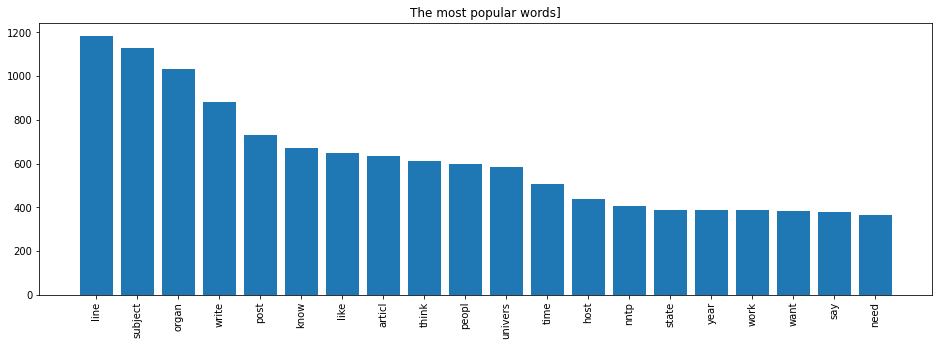

In [10]:
def display_words(data, title, ax):
 count = Counter(sum(map(lambda text: tokenize_words(text), data), []))
 popular = np.array(sorted(count.items(), key=lambda x: x[1], reverse=True)[:20])
 plt.sca(ax)
 plt.title(title)
 plt.bar(popular[:,0], np.int32(popular[:,1]))
 plt.xticks(rotation="vertical")
fig, ax = plt.subplots(figsize=(16, 5))
display_words(data_processed.sample(1000).content, "The most popular words]", ax)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(data_processed['content'])
count_data

<11314x61410 sparse matrix of type '<class 'numpy.int64'>'
	with 934270 stored elements in Compressed Sparse Row format>

In [13]:
likelihood = []
n_clusters = []

In [14]:
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [15]:
def estimate_number_clusters(data, nclusters):
 for n in nclusters:
   likelihood.append(LDA(n_components=n, n_jobs=-1).fit(data).score(data))
 n_clusters.append(n)
 print("Sccesfully estimated ", n)
 fig, ax = plt.subplots(figsize=(15, 5))
 sns.lineplot(x=n_clusters, y=likelihood, ax=ax)
 ax.set_title('Elbow method for choosing n, likelihood')
 ax.set_ylabel('Likelihood')
 ax.set_xlabel('n')




In [16]:
# estimate_number_clusters(count_data, [10, 15, 20, 50])
 
 

In [17]:
def print_topics(model, count_vectorizer, n_top_words):
  words = count_vectorizer.get_feature_names()
  for topic_idx, topic in enumerate(model.components_):
    print("\nTopic #%d:" % topic_idx)
    print(" ".join([words[i]
  for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [18]:
from sklearn.decomposition import LatentDirichletAllocation as LDA


In [19]:
number_topics = 30
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
card driver line subject organ video write mode post work

Topic #1:
write moral subject line organ think articl object post caltech

Topic #2:
organ line write subject pitt articl bank gordon post nntp

Topic #3:
access digex subject line organ post write nntp host insur

Topic #4:
line organ subject henri toronto post radar write detector netcom

Topic #5:
line subject organ know work problem drive write scsi appl

Topic #6:
game team year player line play think organ subject season

Topic #7:
line subject organ sale univers post host nntp columbia mail

Topic #8:
ohio cleveland cwru state subject organ line articl freenet write

Topic #9:
line subject organ like write bike articl drive good look

Topic #10:
organ subject line post articl write nntp david host know

Topic #11:
write know believ subject line bibl say think organ truth

Topic #12:
church cathol time pope american european organ south like think

Topic #13:
jpeg line subject imag organ p

In [20]:
cluster_probabilities = lda.transform(count_data)
data_processed['target'] = np.argmax(cluster_probabilities, axis=1)
data_processed.head()

,content,target
0,lerxst thing subject nntp post host organ univ...,15
1,guykuo carson washington subject clock poll fi...,5
2,twilli purdu thoma willi subject question orga...,5
3,jgreen amber green subject weitek organ harri ...,26
4,head harvard jonathan mcdowel subject shuttl l...,10


In [21]:
import seaborn as sns


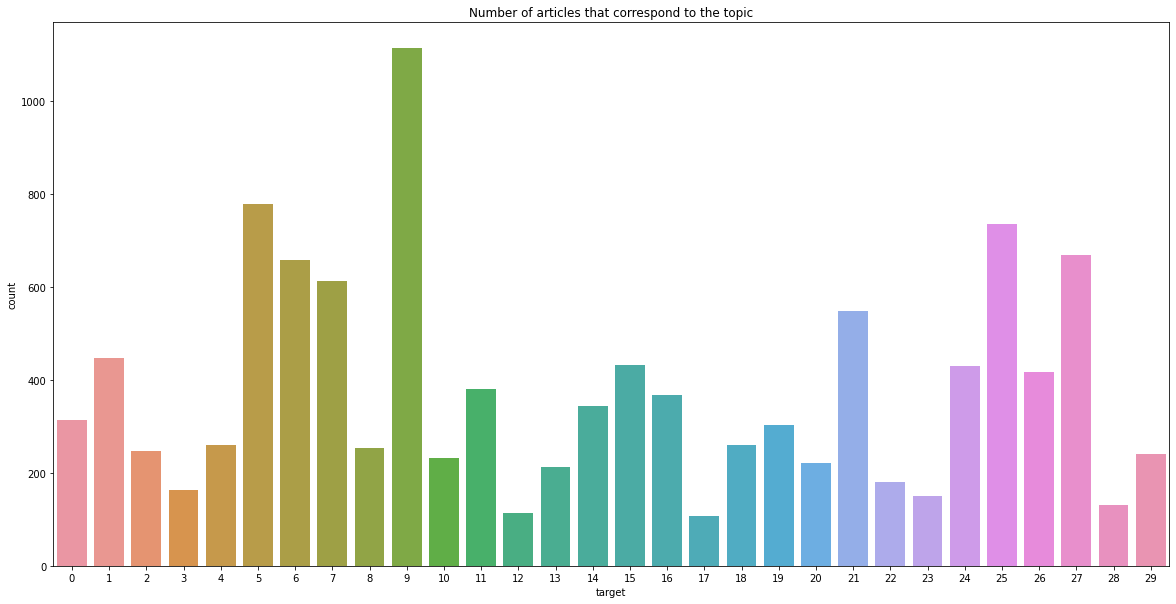

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x=data_processed.target);
ax.set_title("Number of articles that correspond to the topic");


In [23]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [24]:
list(mydata_train)


['data', 'filenames', 'target_names', 'target', 'DESCR']

In [25]:
print('Training data size:', len(mydata_train['data']))


Training data size: 11314


In [26]:
# Printing all the categories
mydata_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:

# Finding frequency of each category
targets, frequency = np.unique(mydata_train.target, return_counts=True)
targets, frequency

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

In [28]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


In [29]:
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))


In [30]:
print('Testing data size:', len(mydata_test['data']))


Testing data size: 7532


In [31]:
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [32]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [33]:
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [34]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


In [35]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
X_train_cv = count_vect.fit_transform(mydata_train_df.data) # fit_transform learns the
X_test_cv = count_vect.transform(mydata_test_df.data) # transform uses the same vocab an
print(X_train_cv.shape)
print(type(X_train_cv))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [36]:
import numpy as np

from tqdm import tqdm

from sklearn.datasets import fetch_20newsgroups

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model

In [37]:
categories = ['alt.atheism', 'soc.religion.christian'] 

newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, 
                                      categories=categories,)

print (newsgroups_train.target_names)
print (len(newsgroups_train.data))

#print (newsgroups_train.data[1])
print("\n".join(newsgroups_train.data[0].split("\n")[10:15]))

['alt.atheism', 'soc.religion.christian']
1079
   WASHINGTON, April 19  -- A symposium on the Dead Sea 
Scrolls will be held at the Library of Congress on Wednesday,
April 21, and Thursday, April 22.  The two-day program, cosponsored
by the library and Baltimore Hebrew University, with additional
support from the Project Judaica Foundation, will be held in the


In [38]:
%%time

texts = []

labels=newsgroups_train.target
texts = newsgroups_train.data

MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

print (sequences[0][:10])

[19, 8762, 3621, 11894, 58, 8762, 3621, 43, 1472, 2]
CPU times: user 425 ms, sys: 5.11 ms, total: 430 ms
Wall time: 435 ms


In [39]:
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 20030 unique tokens.


In [40]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

print (data.shape)
print (data[0][200:250])

(1079, 1000)
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0    19  8762  3621 11894    58  8762  3621
    43  1472     2  2130     3   189   450  1001  3622  2980  1682   476
   627    50]


In [41]:
labels = to_categorical(np.array(labels))

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (1079, 1000)
Shape of label tensor: (1079, 2)


In [42]:
VALIDATION_SPLIT = 0.1

indices = np.arange(data.shape[0])
np.random.shuffle(indices) 
data = data[indices] 
labels = labels[indices] 
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples] 
y_train = labels[:-nb_validation_samples] 
x_val = data[-nb_validation_samples:] 
y_val = labels[-nb_validation_samples:] 

print (x_train.shape)
print (y_train.shape)

print('Number of positive and negative reviews in traing and validation set ') 
print (y_train.sum(axis=0))
print (y_val.sum(axis=0))


(972, 1000)
(972, 2)
Number of positive and negative reviews in traing and validation set 
[434. 538.]
[46. 61.]


In [43]:
EMBEDDING_DIM = 100

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))

for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector

print (embedding_matrix.shape)

print (embedding_matrix[0][:10])

NameError: ignored

In [44]:
embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM,
                            weights=[embedding_matrix], 
                            input_length=MAX_SEQUENCE_LENGTH, 
                            trainable=False)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32') 
embedded_sequences = embedding_layer(sequence_input) 
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences) 
l_pool1 = MaxPooling1D(5)(l_cov1) 
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1) 
l_pool2 = MaxPooling1D(5)(l_cov2) 
l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2) 
l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling

l_flat = Flatten()(l_pool3) 
l_dense = Dense(128, activation='relu')(l_flat) 
preds = Dense(2, activation='softmax')(l_dense)

model = Model(sequence_input, preds)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1000, 100)         2003100   
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 128)           82048 

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=500, batch_size=512)   

Epoch 1/500
2/2 [==============================] - 35s 1s/step - loss: 0.7746 - acc: 0.4851 - val_loss: 0.6963 - val_acc: 0.4766
Epoch 2/500
2/2 [==============================] - 0s 161ms/step - loss: 0.6936 - acc: 0.4684 - val_loss: 0.6884 - val_acc: 0.5701
Epoch 3/500
2/2 [==============================] - 0s 166ms/step - loss: 0.6960 - acc: 0.5513 - val_loss: 0.6913 - val_acc: 0.5888
Epoch 4/500
2/2 [==============================] - 0s 163ms/step - loss: 0.6886 - acc: 0.5566 - val_loss: 0.6821 - val_acc: 0.5701
Epoch 5/500
2/2 [==============================] - 0s 161ms/step - loss: 0.6872 - acc: 0.5624 - val_loss: 0.6825 - val_acc: 0.5701
Epoch 6/500
2/2 [==============================] - 0s 164ms/step - loss: 0.6894 - acc: 0.5096 - val_loss: 0.6870 - val_acc: 0.6075
Epoch 7/500
2/2 [==============================] - 0s 158ms/step - loss: 0.6865 - acc: 0.5819 - val_loss: 0.6816 - val_acc: 0.5701
Epoch 8/500
2/2 [==============================] - 0s 159ms/step - loss: 0.6893 - acc

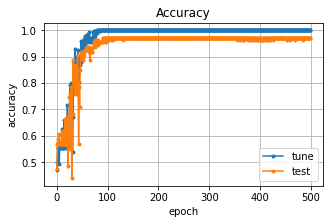

In [46]:
plt.figure(figsize =(5,3))
plt.plot(history.history['acc'], marker='.', label='tune')
plt.plot(history.history['val_acc'], marker='.', label='test')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()